In [8]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load dataset
df = px.data.gapminder()
df_2007 = df[df['year'] == 2007]

# Line Chart: GDP per Capita Over Time for Canada
canada = df[df['country'] == 'Canada']
fig_line = px.line(canada, x='year', y='gdpPercap', title='Canada GDP per Capita Over Time')

# Scatter Plot: GDP vs Life Expectancy (2007)
fig_scatter = px.scatter(df_2007, x='gdpPercap', y='lifeExp', color='continent',
                         title='GDP vs Life Expectancy (2007)')

# Bar Chart: Average GDP by Continent (2007)
avg_gdp = df_2007.groupby('continent')['gdpPercap'].mean().reset_index()
fig_bar = px.bar(avg_gdp, x='continent', y='gdpPercap', title='Average GDP by Continent (2007)')

# Pie Chart: Population by Continent (2007)
continent_pop = df_2007.groupby('continent')['pop'].sum().reset_index()
fig_pie = px.pie(continent_pop, names='continent', values='pop', title='Population by Continent (2007)')

# Choropleth: Life Expectancy by Country (2007)
fig_choropleth = px.choropleth(df_2007, locations='iso_alpha', color='lifeExp',
                               hover_name='country', title='Life Expectancy by Country (2007)',
                               color_continuous_scale=px.colors.sequential.Plasma)

# Bubble Chart: GDP vs Life Expectancy with Population
fig_bubble = px.scatter(df_2007, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                        title='GDP vs Life Expectancy with Population Bubbles (2007)', size_max=60)

# Doughnut Chart: Population by Continent (2007)
fig_doughnut = go.Figure(data=[go.Pie(labels=continent_pop['continent'], values=continent_pop['pop'], hole=0.4)])
fig_doughnut.update_layout(title_text='Population by Continent (2007) - Doughnut Chart')

# Display all figures
fig_line.show()
fig_scatter.show()
fig_bar.show()
fig_pie.show()
fig_choropleth.show()
fig_bubble.show()
fig_doughnut.show()







ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

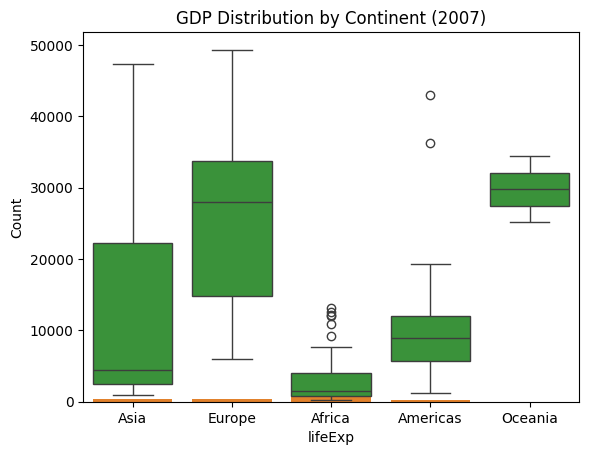

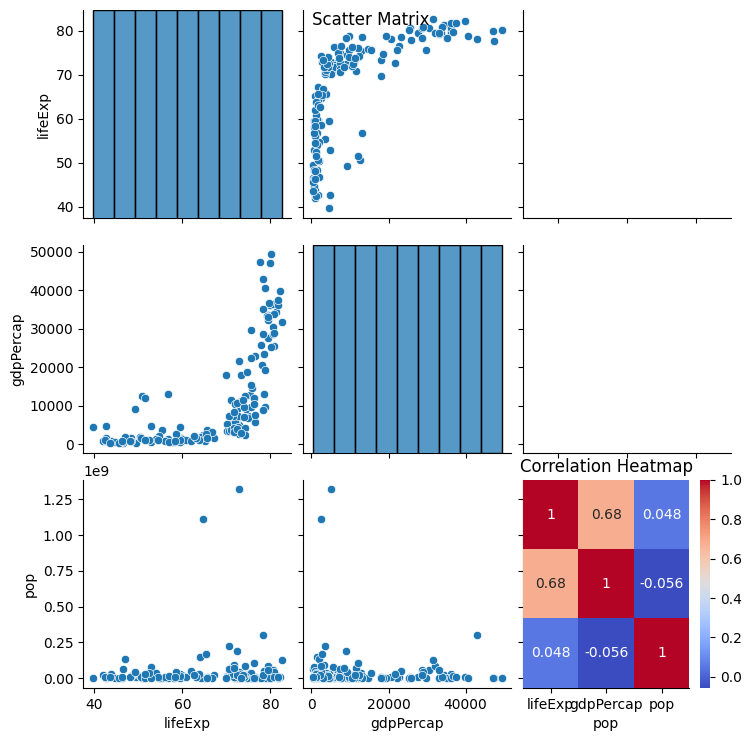

In [5]:


import seaborn as sns
import matplotlib.pyplot as plt
# Histogram: Life Expectancy Distribution
sns.histplot(df['lifeExp'], kde=False)
plt.title('Life Expectancy Distribution')

# Word Count (Count Plot): Countries per Continent
sns.countplot(x='continent', data=df)
plt.title('Number of Countries per Continent')

# Box Plot: GDP by Continent
sns.boxplot(x='continent', y='gdpPercap', data=df_2007)
plt.title('GDP Distribution by Continent (2007)')

# Scatter Matrix
sns.pairplot(df_2007[['lifeExp', 'gdpPercap', 'pop']])
plt.suptitle('Scatter Matrix')

# Violin Plot: GDP by Continent
sns.violinplot(x='continent', y='gdpPercap', data=df_2007)
plt.title('GDP Distribution (Violin Plot)')

# Heatmap: Correlation Matrix
corr = df_2007[['lifeExp', 'gdpPercap', 'pop']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Show all plots
plt.show()






import seaborn as sns
import matplotlib.pyplot as plt
# Histogram: Life Expectancy Distribution
sns.histplot(df['lifeExp'], kde=False)
plt.title('Life Expectancy Distribution')

# Word Count (Count Plot): Countries per Continent
sns.countplot(x='continent', data=df)
plt.title('Number of Countries per Continent')

# Box Plot: GDP by Continent
sns.boxplot(x='continent', y='gdpPercap', data=df_2007)
plt.title('GDP Distribution by Continent (2007)')

# Scatter Matrix
sns.pairplot(df_2007[['lifeExp', 'gdpPercap', 'pop']])
plt.suptitle('Scatter Matrix')

# Violin Plot: GDP by Continent
sns.violinplot(x='continent', y='gdpPercap', data=df_2007)
plt.title('GDP Distribution (Violin Plot)')

# Heatmap: Correlation Matrix
corr = df_2007[['lifeExp', 'gdpPercap', 'pop']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Show all plots
plt.show()






# Create a dashboard with 5 plots
fig_dashboard = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "choropleth"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "pie"}],
           [{"type": "box"}, {"type": "scatter"}]],  # 'box' is specified here
    subplot_titles=(
        "Life Expectancy by Country", "GDP vs Life Expectancy",
        "Average GDP by Continent", "Population Distribution",
        "GDP Distribution by Continent", "GDP vs Life Expectancy Bubbles"
    )
)

# Add traces
fig_dashboard.add_trace(fig_choropleth.data[0], row=1, col=1)
fig_dashboard.add_trace(fig_scatter.data[0], row=1, col=2)
fig_dashboard.add_trace(fig_bar.data[0], row=2, col=1)
fig_dashboard.add_trace(fig_pie.data[0], row=2, col=2)
# Assuming you want to add a box plot from the seaborn plots,
# you need to create a plotly box plot figure first.
# This is just an example, adjust data and layout as needed.
import plotly.express as px  # Make sure plotly.express is imported
fig_box = px.box(df_2007, x='continent', y='gdpPercap', title='GDP Distribution by Continent (2007)')
fig_dashboard.add_trace(fig_box.data[0], row=3, col=1)  # Now fig_box is defined
fig_dashboard.add_trace(fig_bubble.data[0], row=3, col=2)

# Update layout
fig_dashboard.update_layout(height=1200, width=1000, title_text="Gapminder Dashboard", showlegend=False)
fig_dashboard.show()